# Boletín de problemas - preliminar


Jose A. Hernando

*Departamento de Física de Partículas. Universidade de Santiago de Compostela*

Octubre 2024


In [2]:
import time
print(' Last version ', time.asctime() )

 Last version  Tue Sep 30 17:40:35 2025


In [3]:
# general imports
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# numpy and matplotlib
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import scipy.constants as units

In [4]:
print('hbar = {:4e} J/s'.format(units.hbar))
print('c  = {:4e} m/s'.format(units.c))
GeV_to_Julio = units.giga * units.eV
print('GeV  = {:4e} J '.format(GeV_to_Julio))
hbarc = units.hbar * units.c / (GeV_to_Julio * units.femto) # GeV fm
print('hbar c  =  {:4e} GeV fm'.format(hbarc))

hbar = 1.054572e-34 J/s
c  = 2.997925e+08 m/s
GeV  = 1.602177e-10 J 
hbar c  =  1.973270e-01 GeV fm


---------

**problema 1**

Considera que el protón pudiera desintegrarse a $p \to e^+ + \pi^0$ y considera el límite en el tiempo parcial de vida media publicado en [SK](https://arxiv.org/abs/2010.16098)¿Cómo compara con la edad del Universo? ¿Qué cantidad de agua necesitarías para detectar u obtener un límite de la vida media del protón mejor que el actual considerando que se desintegran los protones del H del agua? Los artículos en HEP aparecen habitualmente en el siguiente [archivo](https://arxiv.org/archive/hep-ex) y en la base de datos  [INSPIRE](https://inspirehep.net/). ¿Puedes encontrar cuál es el artículo más citado del experimento SuperKamiokande?


*solución*

Del artículo obtenemos

$$
\tau/B > 2.4 \times 10^{34} \;\; \mathrm{años}
$$

La edad del universo es aproximadamente $13.7 \times 10^{9}$ años.



*Cuestión* ¿Es la desintegración, $p \to e^+ + \pi^0$, posible?



No, no lo es porque violaría el número leptónico y el número bariónico. 

Comentario: Sin embargo no viola B-L. 



*Cuestión* ¿Qué significa $\tau/B$?

Es el tiempo de vida parcial de esa desintegración, la posible $ p \to e^+ + \pi^0$, pero el protón pudiera desintegrarse de otras formas, a otros canales.

Recordemos la relación entre anchura de desintegración y tiempo de vida: 

$$\tau = 1/\Gamma$$

La anchura total se obtiene de la suma de las parciales: 

$$\Gamma = \sum_i \Gamma_i$$

Y la fracción de desintegración $\mathcal{B}_i$

$$
\mathcal{B}_i = \frac{\Gamma_i}{\Gamma}
$$

Esto es la vida parcial 

$$
\tau_i = \frac{1}{\Gamma_i} = \frac{1}{\Gamma} \frac{\Gamma}{\Gamma_i} = \frac{\tau}{\mathcal{B}_i}
$$

*Cuestión* ¿Cuál es la masa necesaria para poner un límite mejor que el actual en este canal?

En realidad se trata de le exposición: kton año

Sea $M$ la masa de agua en g, sea $M_A = 18$ g/mol, siendo $N_A$ el número de Avogadro, el número de protones $N$ del Hidrógeno es:

$$
N = 2 N_A \, \frac{M}{M_A}
$$


Si tenenos $N$ protones y la vida media es $\tau$ en $t=1$ año sobreviven, dado que $t \ll \tau$:

$$
N(t) = N_0 e^{-t/\tau} \simeq N_0 \left( 1-\frac{t}{\tau} \right)
$$

donde $\tau$ aquí es la vida media parcial $\tau_i$, pero omitimos el sub-índice. 

En un año $t=1$ se han desintegrado

$$
\nu = N_0 \frac{t}{\tau} 
$$

¿Qué masa aproximada necesitamos para ver una desintegración si la cuota $\tau$ fuera el valor real?

Consideremos naivemente que vemos 1 evento:

$$
N_0 \frac{t}{\tau} = 1
$$

In [13]:
tau = 2.4e34 # partial proton mean lifetime 
NA  = units.N_A # Avogadro number
MA  = 18 # g/mol
Z   = 2 # number of protons in H2O

M =  tau * MA/(Z*NA)

print('water mass {:1.2e} k tons'.format(M*(1e-9)))


water mass 3.59e+02 k tons


*Cuestión* Si $\tau$ es tal que para $N_0$ esperamos en un año $t=1$, $\nu = 1$ eventos, ¿qué podemos esperar? ¿Siempre mediremos 1 evento? ¿qué distribución sigue?


No, no siempre medimos 1 evento, la distribución de las medidas sigue una distribución de poisson, Porque la probabilidad de que se produzca una desintegración es $1/\tau$, ridículamente pequeña, y el número de intentos de intentos muy alto, luego la binomial original con $p$ muy pequeña y $N$ intentos altos, es una distribución de poisson con $\nu = p N = 1$, siendo $p = 1/\tau$

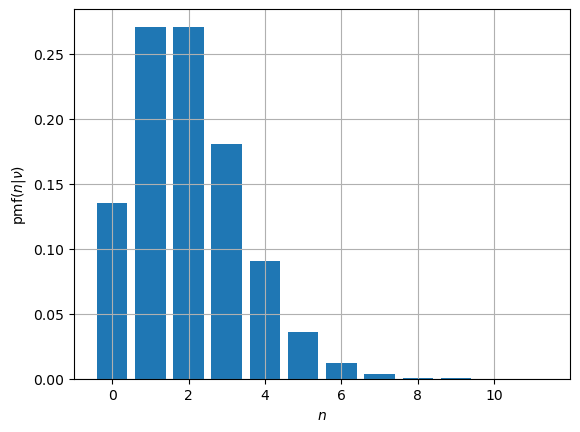

In [17]:
from scipy.stats import poisson

nu = 2.0
ns = np.arange(12)

plt.bar(ns, poisson.pmf(ns, nu))
plt.xlabel(r'$n$'); plt.ylabel(r'pmf$(n | \nu)$'); plt.grid();


*Cuestión* ¿Qué límite ponemos a la vida media al 90% CL si al hacer un experimento observamos 0 eventos?


Llamamos excluidos al 90% CL a aquellos valores del parámetro (aquí, la vida media) para los cuales la probabilidad de reproducir un resultado como el de nuestro experimento —o uno más extremo— es menor al 10%.

La cuestión se convierte entonces en ¿Cuál es la probabilidad de medir 0 si la media de Poisson es $\nu$? ¿Cuándo dicha probabilidad es menor del 10% (esto es el límite al 90%CL)?

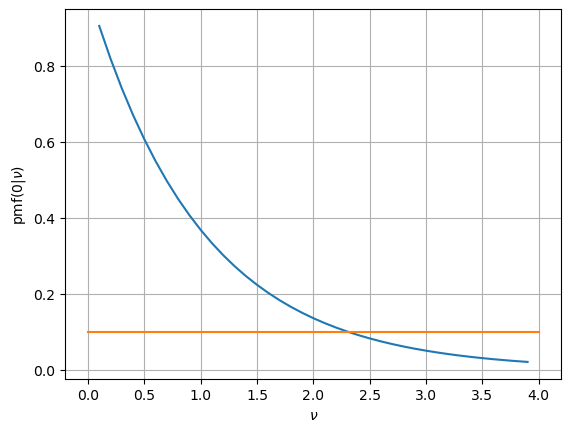

In [18]:
nus = np.arange(0.1, 4, 0.1)
plt.plot(nus, poisson.pmf(0, nus)); plt.grid(); plt.plot((0, 4), (0.1, 0.1))
plt.xlabel(r'$\nu$'); plt.ylabel(r'pmf$(0 | \nu)$');


En el caso de no observar ningún evento, $n = 0$. tras un año de exposición con $N_0$ protones, el número esperado de desintegraciones $\nu$ que hace que la probabilidad de ver cero sucesos sea menor al 10% corresponde a 
$\nu = 2.4$.


Luego en principio el límite al 90 % C.L es:

$$
\frac{t}{\tau} = \frac{\nu}{N_0} \Rightarrow \tau = \frac{N_0}{\nu} t
$$

*Nota* Esto no quiere decir que el valor $\tau$ del límite no sea el valor verdadero, existe todavía un 10% de posibilidades de con ese valor, si realizase un experimento obtuvera un resultado como el que obtenido (en este caso 0) o peor.

*Cuestión* ¿Qué pasa en el caso más general? ¿Qué región de nuestro parámetro $\tau$ decimos que esta excluida al 90% CL?

En el caso general al hacer un experimento de búsqueda de una nueva señal esperamos encontrar en nuestra muestra $b$ eventos de fondo (distribuidos poisson, siendo $b$ pequeño) y observamos $n$, por lo que necesitamos una construcción que nos permita encontrar a partir de $(b, n)$ qué valores teóricos $\nu$ de señal nos darían una probabilidad de obtener una observación como la que hemos obtenido o peor menor con un 10% probabilidades.

La [construcción moderna](https://arxiv.org/abs/physics/9711021) se debe a dos físicos de neutrinos, G. Feldman y B. Cousins, que proposieron un método que lleva su nombre.

*Cuestión* ¿Cuál es el artículo más citado de SK?



En INSPIRE seleccionar experimento SuperKamiokande, luego en ordenar artículos escoger 'most cited', 

"Evidence for oscillation of atmospheric neutrinos", [hep-exp/9807003](https://arxiv.org/abs/hep-ex/9807003), Phys. Rev. Lett 81, 1562-1567,1998

*Cuestión* Lee el abstract. Nota la precaución con la que indican la posible presencia de oscilaciones, por las que después el director del experimento. T. Kajita recibiría el premio Nobel en 2015.

--------

**2) Problema**

¿Cuál es la masa del neutrino? ¿Qué experimento tiene la cuota más baja hasta la fecha? Los experimentos de oscilaciones de neutrinos han medido no obstante las dos diferencias de masas al cuadrado entre los tres neutrinos existentes. $\Delta m^2_{21} = m^2_2 - m^2_1$, es la diferencia de masas al cuadrado entre el neutrino 2 y el 1. Si los resultados experimentales son $\Delta m^2_{21} = 7.5 \times 10^{-5}$ eV$^2$, y $|\Delta m^2_{31}| = 2.5 \times 10^{-3}$ eV$^2$. ¿Puedes hacer un gráfico de la masa de los neutrinos en función de la masa del más ligero?


*Solución*

La melor cuota de la masa del neutrino la ha publicado el experimento [KATRIN](https://en.wikipedia.org/wiki/KATRIN) en 2024, [arXic.2406.13517](https://arxiv.org/abs/2406.13516) y es $m_\nu \lt 0.45$ eV al 90% C.L.

Sabemos que la masa del neutrino $m_2 \gt m_{light}$, siendo $m_{light}$ el más ligero, pero nos sabemos, dado que solo conocemos el valor absoluto de $|\Delta m^2_{31}|$, si el neutrino 1 o el neutrino 3 son los más ligeros.

Vamos 

Text(0.5, 1.0, 'Inverted')

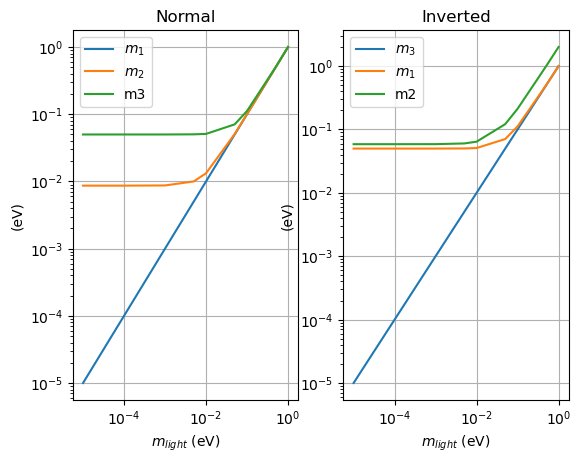

In [67]:
dm21 = 7.5e-5
dm31 = 2.5e-3

m0 = np.array((1e-5, 1e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 5e-1, 1.))

m2    = lambda m0 : np.sqrt(dm21+m0**2)
mup   = lambda m0 : np.sqrt(dm31+m0**2)

plt.subplot(1, 2, 1)
plt.plot(m0, m0, label = r'$m_1$'); plt.plot(m0, m2(m0), label = '$m_2$'), plt.plot(m0, mup(m0), label = 'm3')
plt.xscale('log'); plt.yscale('log'); plt.legend(); plt.xlabel(r'$m_{light}$ (eV)'); plt.ylabel(r"(eV)"); plt.grid(); plt.title('Normal')
plt.subplot(1, 2, 2)
plt.plot(m0, m0, label = r'$m_3$'); plt.plot(m0, mup(m0), label = '$m_1$'), plt.plot(m0, mup(m0) + m2(m0), label = 'm2')
plt.xscale('log'); plt.yscale('log'); plt.legend(); plt.xlabel(r'$m_{light}$ (eV)'); plt.ylabel(r"(eV)"); plt.grid(); plt.title('Inverted')

------

***problema* A partir de los datos del [PDF](https://pdglive.lbl.gov) elabora una tabla con la masa, carga, espín, paridad, vida media y desintegración principal de los leptones. 


|       | $e$ | $\mu$ | $\tau$ | $\nu$ |
| :--   | :-- | :--   | :--    | :--   |
| masa  | 0.511 MeV    | 105.7 MeV  |  1777 MeV|   $\le$ 1 eV     |  
| carga |   -1  | -1 | -1 | 0 |
| vida media ($\tau$)| estable | $2.197$ $\mu\mathrm{s}$ | $290.6$ fs | estable|

|    | Fracción de desintegración |
|:-- | --:                                          |
| $\mu  \to e + \bar{\nu_e} + \nu_\mu$  | $\sim 100$ %|
| $\tau \to \mu + \bar{\nu_\mu} + \nu_\tau$| $17.4$ % |
| $\tau \to e + \bar{\nu_e} + \nu_\tau$| $17.8$ % |
| $\tau \to \mathrm{hadrons}+ \nu_\tau$| $\sim 64$ % |

----------

Crea una segunda tabla con la composición de quarks, masa, carga, espín, paridad, vida media y desintegración principal de los siguientes mesones \$\pi^\pm, \pi^0$, $K^\pm,$ $K^0, D^\pm, D^0, J/\Psi, \Upsilon, B^0, B^0_s$. 

| nombre    | &emsp; quark composition |  $J^{P}$ | &emsp; &emsp;  mass (MeV) &emsp;&emsp; | &emsp;  &emsp; &emsp; life-time &emsp;  | &emsp; &emsp; &emsp; &emsp; main decays &emsp; &emsp; |
| :-- | :--: | :--: | :----:  | :--: | :-- |
| $\pi^0$   | $(\bar{u}u, \bar{d}d)$ | $0^-$   | $134.97$       | $8.43\pm0.6 \, 10^{-17}$  s| $2\gamma$  (98%)|
| $\pi^\pm$ | ($u\bar{d}, \bar{u}d$) | $0^{-}$ | $139.57$       | $26.033\pm0.05$ ns | $\mu + \bar{\nu}_\mu$ (98%) |
| $\rho$    | ($u\bar{u}, \bar{d}d$) | $1^-$   | $7775.5\pm0.4$ | $194.4\pm1$ MeV | $2\pi$| 
| $K^\pm$   | $(\bar{s}u, s\bar{u})$ | $0^{-}$ | $493.677\pm 0.016$| $12.39\pm0.02$ ns | $\mu+ \bar{\nu}_\mu$ (63%), $\pi^- \pi^0$ (20 %) |
| $K^0_S$   | $(\bar{s}d, \bar{d}s)$ | $0^{-}$  | $497.648\pm0.022$ | $89.5\pm0.05$ ps | $\pi^++\pi^-$ (69%), $2\pi^0 $ (30%)|
| $K^0_L$   | $(\bar{s}d, \bar{d}s)$ | $0^{-}$  | $497.648\pm0.022$ | $51.14\pm0.21$ ns | $\pi^\pm + e^\pm + \nu_e$ (40%), $\pi^\pm + \mu^\pm + \bar{\nu}_\mu$ (27%)|
| $\phi$    | $(s\bar{s})$          | $1^-$    | $1019.46\pm0.019$ | $4.26\pm0.05$ MeV | $K+\bar{K}, \pi^++\pi^-+\pi^0$|
| $D^\pm$   | $(c\bar{d},d\bar{c})$ |$0^{-}$ | $1869.3\pm0.4$ | $0.500\pm 0.007$ ps | $K+...$ |
| $D^0, \bar{D}^0$    | $(c\bar{u},u\bar{c})$ |$0^{-}$ | $1864.5\pm0.4$    | $0.410\pm 0.002$ ps | $K+...$ |
| $B^0, \bar{B}^0$    | $(b\bar{d},d\bar{b})$ |$0^{-}$ | $5279.4\pm0.5$    | $1.530\pm 0.009$ ps | $D+...$ |
| $B^0_s, \bar{B}^0_s$| $(b\bar{s},s\bar{b})$ |$0^{-}$ | $5367.5\pm1.8$    | $1.466\pm 0.059$ ps | $D^\pm_s+...$ |
| $J/\Psi$            | $(c\bar{c})$          |$1^{-}$ | $3096.92\pm0.011$ | $93.4\pm2.1$ keV    | hadrons (87%), $\mu+\mu^+, e+e^+$ (6%) |
| $\Upsilon$      | $(b\bar{b})$          |$1^{-}$ | $9460.3\pm0.3$ | $31.98\pm2.63$ keV | $l+l^+$ |

-----

**problema** Identifica los bariones que se forman con los quarks ligeros $(u, d, s)$. 

| nombre    | &emsp; quark composition |  $J^{P}$ | &emsp; &emsp;  mass (MeV) &emsp;&emsp; | &emsp;  &emsp; &emsp; life-time &emsp;  | &emsp; &emsp; &emsp; &emsp; main decays &emsp; &emsp; |
| :-- | :--: | :--: | :----:  | :--: | :-- |
| $p$            | (uud) | $1/2^+$ | $938.27$              | $>3.6 \, 10^{29}$ y        | None |
| $n$            | (udd) | $1/2^+$ | $939.56$              | $874.4\pm0.6$ s            | $p +e +\bar{\nu}_e$ (100%)|
| $\Delta$ | (uuu) | $3/2^+$ | $1232 \pm 2$         | $118 \pm 2$ MeV             | $p + \pi^-, n+ \pi^0$ |
| $\Lambda$      | (uus) | $1/2^+$ | $1115.683 \pm 0.006$ | $263 \pm2$ ps               | $p + \pi^0, n+ \pi^+$|
| $\Sigma^0$     | (uds) | $1/2^+$ | $1182.64 \pm 0.02$   | $7.4 \pm 0.7 \, 10^{-20}$ s | $\Lambda+\gamma$|
| $\Omega^-$     | (sss) | $3/2^+$ | $1672.45 \pm 0.29$   | $82.1\pm 1.1$ ps            | $\Lambda+K^+, ...$|


[Sobre el descubrimiento de $\Omega^-$](https://en.wikipedia.org/wiki/Omega_baryon)

------

**problema** Sean $\Lambda \rightarrow p + \pi^-$ y $\Xi^- \rightarrow \Lambda+\pi^-$. ¿Cuál es la carga de $\Lambda$? Indica si $\Lambda$ y $\Xi^-$ son bariones o mesones. Indicas sus masa, sus vidas medias y su fracción de desintegración. ¿Qué tipo de desintegración es, débil o fuerte? 

Del [PDG](https://pdg.lbl.gov/2021/listings/contents_listings.html)

$m(\Lambda) = 1115.683 \pm 0.006$ MeV, $\mathcal{Br}(\Lambda \to p + \pi^-) = 63.9 \pm 0.5$ %, $\tau = (2.632 \pm 0.02) \, 10^{-10}$ s

Del [PDG](https://pdg.lbl.gov/2021/listings/contents_listings.html)
                                        
$m(\Xi^-) = 1321.71 \pm 0.07$ MeV, $\mathcal{Br}(\Xi^- \to \Lambda + \pi^-) = 99.9$ %, $\tau = (1.639 \pm 0.015) \, 10^{-10}$ s

Los dos son bariones, $\Lambda$ tiene carga 0, y por el valor de la vida media se desintegran débilmente.

-----

**problema** Recientemente el CERN ha festejado su 70 aniversario. ¿Indica cuáles han sido los dos grandes colionadores del CERN y sus parámetros principales? ¿Cuáles son los hitos y descubrimientos principales realizados en el CERN? 

* [Discovery of the $W^\pm$ bosons](https://home.cern/news/news/physics/w-boson-turns-40#:~:text=Exactly%20four%20decades%20ago%20today,elementary%20particle%20%E2%80%93%20the%20W%20boson.)

* [Discovery of the neutral currents](https://home.cern/news/news/physics/forty-years-neutral-currents)

* [Verification of the $Z^0$ propierties and the 3 neutrino flavours](https://home.cern/news/opinion/physics/thirty-years-leps-z0-line-shape)

* [Discovery of the Higgs](https://home.cern/science/physics/higgs-boson)

* [Invention of the WWW](https://home.cern/science/computing/birth-web)

Aceleradores

* [LHC](https://home.cern/science/accelerators/large-hadron-collider) protón-protón colisions at 7, 13 TeV CM energy

* [LEP](https://home.cern/science/accelerators/large-electron-positron-collider), e+ + e- colider at 91 GeV CM Energy and up to 200 GeV in Run-II

----

**problema** Investiga brevemente la bibliografía y contribuciones de los siguientes físicos:  Paul Dirac, Ettore Majorana, Wolfgang Pauli, Enrico Fermi, Richard Feynman, Chien-Shiung Wu, Bruno Pontecorvo, Sheldon Glashow, Steven Weinberg, Abdus Salam y Peter Higgs.

* [Paul Dirac](https://en.wikipedia.org/wiki/Paul_Dirac)

* [Ettore Majorana](https://en.wikipedia.org/wiki/Ettore_Majorana)

* [Wolfgang Pauli](https://en.wikipedia.org/wiki/Wolfgang_Pauli)

* [Erico Fermi](https://en.wikipedia.org/wiki/Enrico_Fermi)

* [Richar Feynman](https://en.wikipedia.org/wiki/Richard_Feynman)

* [Chien-Shiung Wu](https://en.wikipedia.org/wiki/Chien-Shiung_Wu)

* [Bruno Pontecorvo](https://en.wikipedia.org/wiki/Bruno_Pontecorvo)

* [Sheldon Glashow](https://en.wikipedia.org/wiki/Sheldon_Glashow)

* [Steven Weinberg](https://en.wikipedia.org/wiki/Steven_Weinberg)

* [Abdus Salam](https://en.wikipedia.org/wiki/Abdus_Salam)

* [Peter Higgs](https://en.wikipedia.org/wiki/Peter_Higgs)

----

**problema** Identifica el objetivo, detectores, periodo de operación y tamaño de los siguientes experimentos: SuperKamiokande, ATLAS, LHCb, IceCube, ALEPH, DELPHI, Gargamelle, BaBar, UA1, Gerda y SNO. 


* [SuperKamiokande](https://www-sk.icrr.u-tokyo.ac.jp/en/sk/)

* [ATLAS](https://atlas.cern/)

* [LHCb](https://home.cern/science/experiments/lhcb)

* [IceCube](https://icecube.wisc.edu/)

* [ALEPH](https://en.wikipedia.org/wiki/ALEPH_experiment)

* [DElPHI](https://en.wikipedia.org/wiki/DELPHI_experiment)

* [Gargamelle](https://en.wikipedia.org/wiki/Gargamelle)

* [BaBar](https://en.wikipedia.org/wiki/BaBar_experiment)

* [UA1](https://en.wikipedia.org/wiki/UA1_experiment)

* [Gerda](https://www.mpi-hd.mpg.de/gerda/)

* [SNO](https://en.wikipedia.org/wiki/Sudbury_Neutrino_Observatory)